In [33]:
import numpy as np
from pylab import *
from neurons import leaky_integrate
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration of a simple leaky integrate and fire neuron

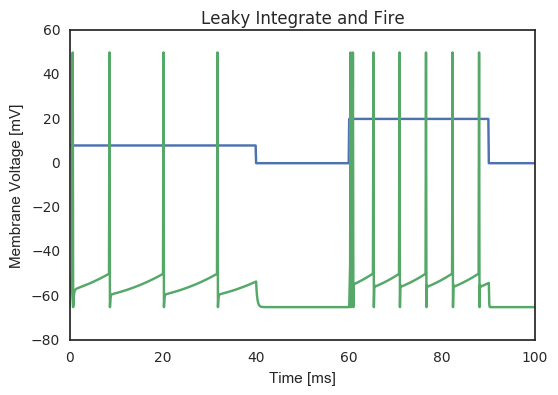

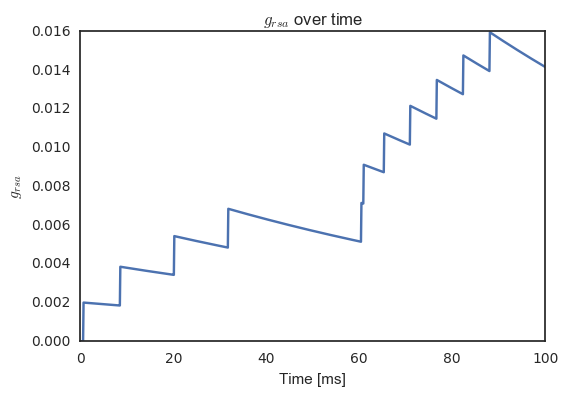

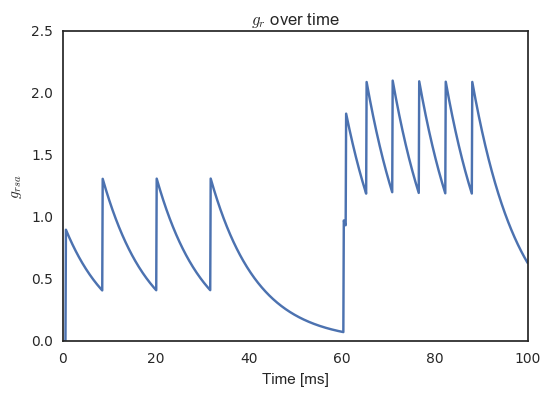

In [140]:
nb_timesteps = 1000
dt = .1

tt = np.linspace(0,nb_timesteps*dt,nb_timesteps)
I = np.zeros_like(tt)

I[:nb_timesteps*9//10] = 20
I[:nb_timesteps*6//10] = 0
I[:nb_timesteps*4//10] = 8

u, params = leaky_integrate(tt, I, spike_rate_adaption=False, refractory=True, slow_down=1)
g_rsa,g_r = params

plot(tt,I)
plot(tt,u)
title("Leaky Integrate and Fire")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")
show()

title("$g_{rsa}$ over time")
plot(tt,g_rsa)
xlabel("Time [ms]")
ylabel("$g_{rsa}$")
show()

title("$g_{r}$ over time")
plot(tt,g_r)
xlabel("Time [ms]")
ylabel("$g_{rsa}$")
show()

# Neuron Response to Random Input Current

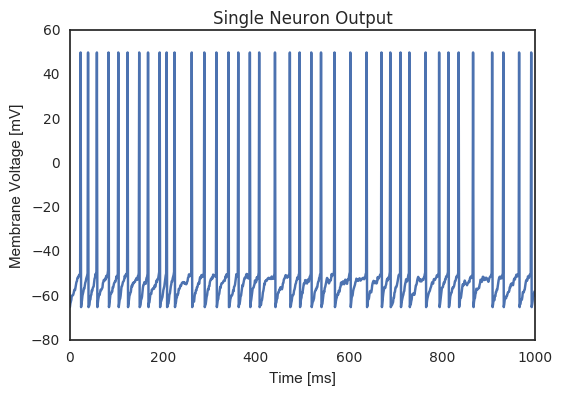

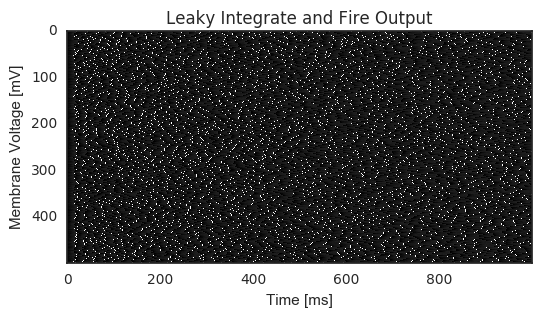

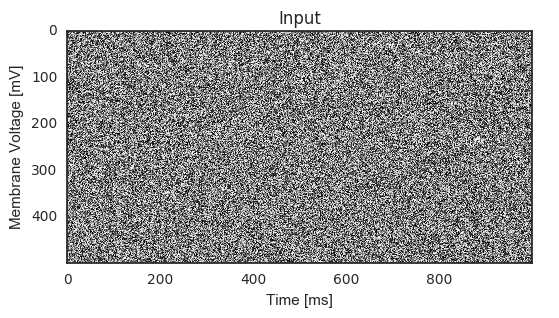

In [38]:
import numpy as np
from pylab import *
%matplotlib inline

nb_timesteps = 1000
dt = .1
nb_neurons = 500
tt = np.linspace(0,nb_timesteps*dt,nb_timesteps)
I = np.random.uniform(0,5,size=(nb_timesteps, nb_neurons))

u, params = leaky_integrate(tt, I, spike_rate_adaption=False, refractory=False, slow_down=1)
g_rsa,g_r = params

    
title("Single Neuron Output")
plot(u[:,2])
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")
show()

imshow(u.T,cmap="gray",interpolation="none")
title("Leaky Integrate and Fire Output")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")
show()

imshow(I.T,cmap="gray",interpolation="none")
title("Input")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")
show()

2000 (5000, 2000)


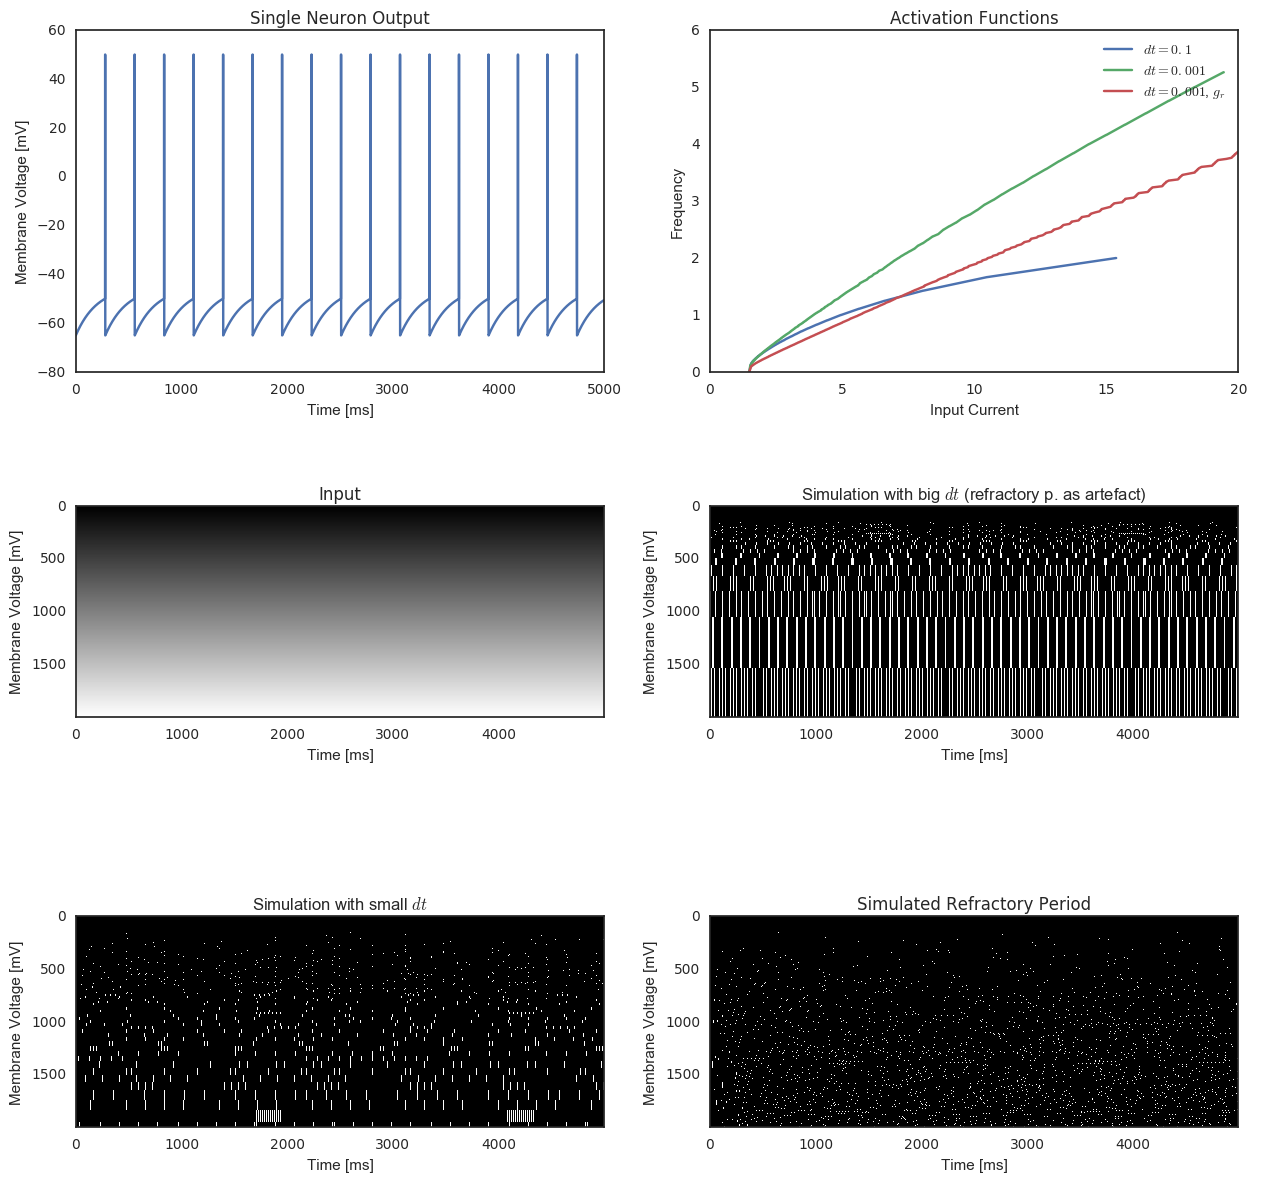

In [157]:
import numpy as np
from pylab import *
%matplotlib inline

grad = lambda x : np.concatenate((x[1:], x[-1:]), axis=0) - np.concatenate((x[:1], x[:-1]), axis=0)

def plot_activation(x,y,*args,**kwargs):
    select, = np.where(grad(grad(y)) > 0)
    plot(x[select], y[select],*args,**kwargs)

def sweep(nb_timesteps = 5000,dt = .001,nb_neurons = 2000,I_max = 20,**kwargs):
    tt = np.linspace(0,nb_timesteps*dt,nb_timesteps)
    I = np.stack( (np.linspace(0,I_max,nb_neurons) for i in range(nb_timesteps)), axis=0)
    u, params = leaky_integrate(tt, I, spike_rate_adaption=False, slow_down=1, **kwargs)
    g_rsa,g_r = params
    spikes = u > 40
    freq = spikes.sum(axis=0) / tt[-1]
    return tt, I, u, spikes, freq

nb_neurons = 2000

# this will show a refractory period
tt,I,_,spikes,freq   = sweep(dt=.1, nb_neurons=nb_neurons)
_,_,u,spikes2, freq2 = sweep(dt=.01, nb_neurons=nb_neurons)
_,_,_,spikes3, freq3 = sweep(dt=.01, refractory=True, nb_neurons=nb_neurons)

figure(figsize=(15,15))

print(nb_neurons, u.shape)

cols = 2
rows = 3

subplot(rows,cols,1)
title("Single Neuron Output")
plot(u[:,nb_neurons//10])
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")

subplot(rows,cols,2)
title("Activation Functions")
xlabel("Input Current")
ylabel("Frequency")
plot_activation(I[0,:], freq,label="$dt=0.1$")
plot_activation(I[0,:], freq2,label="$dt=0.001$")
plot_activation(I[0,:], freq3,label="$dt=0.001$, $g_r$")
legend()

subplot(rows,cols,3)
imshow(I.T,cmap="gray",interpolation="none")
title("Input")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")

subplot(rows,cols,4)
imshow(spikes.T,cmap="gray",interpolation="none")
title("Simulation with big $dt$ (refractory p. as artefact)")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")

subplot(rows,cols,5)
imshow(spikes2.T,cmap="gray",interpolation="none")
title("Simulation with small $dt$")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")

subplot(rows,cols,6)
imshow(spikes3.T,cmap="gray",interpolation="none")
title("Simulated Refractory Period")
xlabel("Time [ms]")
ylabel("Membrane Voltage [mV]")

show()